In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy.stats import norm
import matplotlib.pyplot as plt

In [8]:
file_path = 'Data_Project1.xlsx'
data = pd.read_excel(file_path, sheet_name='Entertainment', header=1)
df = data.dropna()
df = data.dropna().copy()
df.set_index('Code', inplace=True)
df

,@ATVI(P#T),J:NNDO(P#T)~USD,U:SONY(P#T),@EA(P#T),@MSFT(P#T)
Code,,,,,
2014-01-01,17.83,13.33,17.29,22.94,37.4100
2014-01-02,18.07,13.34,17.16,22.83,37.1600
2014-01-03,18.29,13.41,17.18,22.68,36.9100
2014-01-06,18.08,13.70,17.30,22.53,36.1300
2014-01-07,18.31,13.67,17.32,23.10,36.4100
...,...,...,...,...,...
2023-10-06,94.24,41.81,82.97,122.96,327.2600
2023-10-09,94.34,42.04,83.50,124.59,329.8201
2023-10-10,94.34,42.40,84.61,128.08,328.3899


In [9]:
#Rename the variables
df.rename(columns={'@ATVI(P#T)': 'ACTIVISION'}, inplace=True)
df.rename(columns={'J:NNDO(P#T)~USD': 'NINTENDO'}, inplace=True)
df.rename(columns={'U:SONY(P#T)': 'SONY GROUP ADR'}, inplace=True)
df.rename(columns={'@EA(P#T)': 'ELECTRONIC ARTS'}, inplace=True)
df.rename(columns={'@MSFT(P#T)': 'MICROSOFT'}, inplace=True)
df.index.name = 'Date'
df

,ACTIVISION,NINTENDO,SONY GROUP ADR,ELECTRONIC ARTS,MICROSOFT
Date,,,,,
2014-01-01,17.83,13.33,17.29,22.94,37.4100
2014-01-02,18.07,13.34,17.16,22.83,37.1600
2014-01-03,18.29,13.41,17.18,22.68,36.9100
2014-01-06,18.08,13.70,17.30,22.53,36.1300
2014-01-07,18.31,13.67,17.32,23.10,36.4100
...,...,...,...,...,...
2023-10-06,94.24,41.81,82.97,122.96,327.2600
2023-10-09,94.34,42.04,83.50,124.59,329.8201
2023-10-10,94.34,42.40,84.61,128.08,328.3899


In [10]:
#Daily simple returns 
daily_returns = df.pct_change()
daily_returns = daily_returns.dropna()
daily_returns

,ACTIVISION,NINTENDO,SONY GROUP ADR,ELECTRONIC ARTS,MICROSOFT
Date,,,,,
2014-01-02,0.013460,0.000750,-0.007519,-0.004795,-0.006683
2014-01-03,0.012175,0.005247,0.001166,-0.006570,-0.006728
2014-01-06,-0.011482,0.021626,0.006985,-0.006614,-0.021132
2014-01-07,0.012721,-0.002190,0.001156,0.025300,0.007750
2014-01-08,0.001638,0.106072,0.053695,0.009091,-0.017852
...,...,...,...,...,...
2023-10-06,0.006085,-0.001194,0.001328,0.017965,0.024737
2023-10-09,0.001061,0.005501,0.006388,0.013256,0.007823
2023-10-10,0.000000,0.008563,0.013293,0.028012,-0.004336


In [11]:
#Daily log returns
daily_log_returns = np.log(df / df.shift(1))
daily_log_returns = daily_log_returns.dropna()
daily_log_returns

,ACTIVISION,NINTENDO,SONY GROUP ADR,ELECTRONIC ARTS,MICROSOFT
Date,,,,,
2014-01-02,0.013371,0.000750,-0.007547,-0.004807,-0.006705
2014-01-03,0.012101,0.005234,0.001165,-0.006592,-0.006750
2014-01-06,-0.011548,0.021395,0.006961,-0.006636,-0.021359
2014-01-07,0.012641,-0.002192,0.001155,0.024985,0.007720
2014-01-08,0.001637,0.100815,0.052303,0.009050,-0.018014
...,...,...,...,...,...
2023-10-06,0.006067,-0.001195,0.001327,0.017806,0.024436
2023-10-09,0.001061,0.005486,0.006368,0.013169,0.007792
2023-10-10,0.000000,0.008527,0.013206,0.027627,-0.004346


In [12]:
#Weekly returns 
weekly_returns = df.iloc[3::5].pct_change()
weekly_returns= weekly_returns.dropna()
weekly_returns

,ACTIVISION,NINTENDO,SONY GROUP ADR,ELECTRONIC ARTS,MICROSOFT
Date,,,,,
2014-01-13,-0.011615,0.135766,0.014451,-0.006658,-0.031830
2014-01-20,-0.050923,-0.151028,-0.028490,0.076854,0.040023
2014-01-27,-0.017099,-0.020439,-0.048094,0.015353,-0.009621
2014-02-03,0.023395,-0.081917,-0.060382,0.065795,0.012490
2014-02-10,0.134818,-0.001684,0.093770,0.030675,0.008772
...,...,...,...,...,...
2023-09-11,0.001521,0.016826,-0.000704,0.016509,0.028236
2023-09-18,-0.002929,-0.013560,0.018310,-0.015751,-0.026276
2023-09-25,0.023284,-0.026328,-0.040226,-0.007380,-0.035009


In [13]:
#Weekly log returns 
log_returns = np.log(df.iloc[3::5]).diff()
log_returns= log_returns.dropna()
log_returns

,ACTIVISION,NINTENDO,SONY GROUP ADR,ELECTRONIC ARTS,MICROSOFT
Date,,,,,
2014-01-13,-0.011683,0.127308,0.014347,-0.006680,-0.032347
2014-01-20,-0.052266,-0.163729,-0.028904,0.074044,0.039243
2014-01-27,-0.017247,-0.020651,-0.049289,0.015236,-0.009667
2014-02-03,0.023126,-0.085467,-0.062282,0.063721,0.012412
2014-02-10,0.126473,-0.001685,0.089631,0.030214,0.008734
...,...,...,...,...,...
2023-09-11,0.001520,0.016686,-0.000704,0.016374,0.027845
2023-09-18,-0.002933,-0.013653,0.018144,-0.015877,-0.026628
2023-09-25,0.023017,-0.026681,-0.041057,-0.007407,-0.035637


In [14]:
#Desciptive statistics Daily returns 
statistics_daily_returns = pd.DataFrame({
    'Mean': daily_returns.mean(),
    'Variance': daily_returns.var(),
    'Skewness': daily_returns.skew(),
    'Kurtosis': daily_returns.kurtosis(),
    'Minimum': daily_returns.min(),
    'Maximum': daily_returns.max()
})
statistics_daily_returns

,Mean,Variance,Skewness,Kurtosis,Minimum,Maximum
ACTIVISION,0.000848,0.000393,1.031311,20.175788,-0.140595,0.258755
NINTENDO,0.000698,0.000493,0.922937,13.056417,-0.175828,0.220025
SONY GROUP ADR,0.000805,0.000349,0.566611,6.757748,-0.093264,0.176934
ELECTRONIC ARTS,0.000859,0.000352,0.958760,14.137493,-0.133052,0.210339
MICROSOFT,0.000997,0.000284,0.130481,8.232583,-0.147390,0.142169


In [15]:
#Desciptive statistics Log Daily returns 
statistics_log_daily_returns = pd.DataFrame({
    'Mean': daily_log_returns.mean(),
    'Variance': daily_log_returns.var(),
    'Skewness': daily_log_returns.skew(),
    'Kurtosis': daily_log_returns.kurtosis(),
    'Minimum': daily_log_returns.min(),
    'Maximum': daily_log_returns.max()
})
statistics_log_daily_returns

,Mean,Variance,Skewness,Kurtosis,Minimum,Maximum
ACTIVISION,0.000653,0.000387,0.471870,15.964097,-0.151515,0.230123
NINTENDO,0.000454,0.000486,0.478191,11.329361,-0.193376,0.198871
SONY GROUP ADR,0.000631,0.000346,0.344736,5.787704,-0.097904,0.162913
ELECTRONIC ARTS,0.000685,0.000347,0.564629,11.780468,-0.142777,0.190900
MICROSOFT,0.000855,0.000283,-0.130523,8.523156,-0.159453,0.132929


In [16]:
#Descritpive statistics weekly returns 
statistics_weekly_returns = pd.DataFrame({
    'Mean': weekly_returns.mean(),
    'Variance': weekly_returns.var(),
    'Skewness': weekly_returns.skew(),
    'Kurtosis': weekly_returns.kurtosis(),
    'Minimum': weekly_returns.min(),
    'Maximum': weekly_returns.max()
})
statistics_weekly_returns

,Mean,Variance,Skewness,Kurtosis,Minimum,Maximum
ACTIVISION,0.004125,0.001745,-0.084410,3.411485,-0.171618,0.222970
NINTENDO,0.003472,0.002652,1.611133,11.797939,-0.189829,0.367036
SONY GROUP ADR,0.003989,0.001807,0.368924,1.625024,-0.133433,0.180695
ELECTRONIC ARTS,0.004167,0.001614,0.197271,3.856469,-0.138851,0.227747
MICROSOFT,0.004948,0.001192,-0.021095,2.622393,-0.128306,0.178335


In [17]:
#Descriptive statistics weekly log returns 
statistics_log_weekly_returns = pd.DataFrame({
    'Mean': log_returns.mean(),
    'Variance': log_returns.var(),
    'Skewness': log_returns.skew(),
    'Kurtosis': log_returns.kurtosis(),
    'Minimum': log_returns.min(),
    'Maximum': log_returns.max()
})

statistics_log_weekly_returns

,Mean,Variance,Skewness,Kurtosis,Minimum,Maximum
ACTIVISION,0.003246,0.001754,-0.416628,3.478271,-0.188281,0.201282
NINTENDO,0.002203,0.002492,0.873435,7.948006,-0.210510,0.312645
SONY GROUP ADR,0.003093,0.001777,0.152571,1.443634,-0.143216,0.166103
ELECTRONIC ARTS,0.003360,0.001603,-0.130610,3.323471,-0.149488,0.205181
MICROSOFT,0.004345,0.001188,-0.253582,2.541173,-0.137317,0.164102


In [18]:
#2 Stationarity

In [79]:
log_prices = np.log(df).dropna()
log_prices_pt_minus_1 = log_prices.shift(1).dropna()

# Iterate over each column in log_prices
for column in log_prices.columns:
    # Define dependent and independent variables for this column
    y = log_prices[column].iloc[1:]  # Dependent variable (excluding the first row)
    X = log_prices_pt_minus_1[column]  # Independent variable

    # Add a constant to the independent variable (for intercept)
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the summary results for this column
    print(f"Regression results for column '{column}':")
    print(model.summary())
    print("\n")

Regression results for column 'ACTIVISION':
                            OLS Regression Results                            
Dep. Variable:             ACTIVISION   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.556e+06
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:03:09   Log-Likelihood:                 6404.5
No. Observations:                2551   AIC:                        -1.280e+04
Df Residuals:                    2549   BIC:                        -1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

In [80]:
# Perform Dickey-Fuller test
for column in log_prices.columns:
    # Perform the Dickey-Fuller test
    result = adfuller(log_prices[column])

    # Print the results
    print(f"Results for column '{column}':")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
# Decision based on the ADF statistic and critical values
    if result[0] < result[4]['5%']:
        print("Reject the null hypothesis: The series is likely stationary.")
    else:
        print("Fail to reject the null hypothesis: The series is likely non-stationary.")
    
    print("\n")

Results for column 'ACTIVISION':
ADF Statistic: -1.7518222911200345
p-value: 0.4046290405894562
Critical Values:
	1%: -3.432918025717116
	5%: -2.862674549708125
	10%: -2.567373963123101
Fail to reject the null hypothesis: The series is likely non-stationary.


Results for column 'NINTENDO':
ADF Statistic: -1.3577359728221454
p-value: 0.6023620734701134
Critical Values:
	1%: -3.4329271342415577
	5%: -2.8626785721005303
	10%: -2.5673761046872094
Fail to reject the null hypothesis: The series is likely non-stationary.


Results for column 'SONY GROUP ADR':
ADF Statistic: -1.4950179140604993
p-value: 0.5359744501379918
Critical Values:
	1%: -3.43291701763171
	5%: -2.862674104529329
	10%: -2.567373726105344
Fail to reject the null hypothesis: The series is likely non-stationary.


Results for column 'ELECTRONIC ARTS':
ADF Statistic: -3.643020499966775
p-value: 0.004989872242629771
Critical Values:
	1%: -3.4329240908958814
	5%: -2.8626772281377195
	10%: -2.5673753891470175
Reject the null hy

In [67]:
#2.3
rt = (np.log(df).dropna() - log_prices_pt_minus_1).dropna()
rt


,ACTIVISION,NINTENDO,SONY GROUP ADR,ELECTRONIC ARTS,MICROSOFT
Date,,,,,
2014-01-02,0.013371,0.000750,-0.007547,-0.004807,-0.006705
2014-01-03,0.012101,0.005234,0.001165,-0.006592,-0.006750
2014-01-06,-0.011548,0.021395,0.006961,-0.006636,-0.021359
2014-01-07,0.012641,-0.002192,0.001155,0.024985,0.007720
2014-01-08,0.001637,0.100815,0.052303,0.009050,-0.018014
...,...,...,...,...,...
2023-10-06,0.006067,-0.001195,0.001327,0.017806,0.024436
2023-10-09,0.001061,0.005486,0.006368,0.013169,0.007792
2023-10-10,0.000000,0.008527,0.013206,0.027627,-0.004346


In [81]:
# Iterate over each column in log_prices
for column in rt.columns:
    # Define dependent and independent variables for this column
    y = rt[column].iloc[0:]  # Dependent variable 
    X = log_prices_pt_minus_1[column]  # Independent variable

    # Add a constant to the independent variable (for intercept)
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the summary results for this column
    print(f"Regression results for column '{column}':")
    print(model.summary())
    print("\n")

Regression results for column 'ACTIVISION':
                            OLS Regression Results                            
Dep. Variable:             ACTIVISION   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.307
Date:                Mon, 18 Mar 2024   Prob (F-statistic):             0.0691
Time:                        19:04:28   Log-Likelihood:                 6404.5
No. Observations:                2551   AIC:                        -1.280e+04
Df Residuals:                    2549   BIC:                        -1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

In [87]:
# Calculate residuals
for column in rt.columns:
    # Define dependent and independent variables for this column
    y = rt[column].iloc[0:]  # Dependent variable (excluding the first row)
    X = log_prices_pt_minus_1[column]  # Independent variable (excluding the last row)

    # Add a constant to the independent variable (for intercept)
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Calculate residuals
    residuals = model.resid

    # Perform the Augmented Dickey-Fuller (ADF) test on residuals
    result = adfuller(residuals)

    # Print the ADF test results
    print(f"ADF test results for residuals of column '{column}':")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[0] < result[4]['5%']:
        print("Reject the null hypothesis: The residuals are likely stationary.")
    else:
        print("Fail to reject the null hypothesis: The residuals are likely non-stationary.")
    print("\n")

ADF test results for residuals of column 'ACTIVISION':
ADF Statistic: -38.275802913010686
p-value: 0.0
Critical Values:
	1%: -3.432918025717116
	5%: -2.862674549708125
	10%: -2.567373963123101
Reject the null hypothesis: The residuals are likely stationary.


ADF test results for residuals of column 'NINTENDO':
ADF Statistic: -16.605359278860018
p-value: 1.7498035582658184e-29
Critical Values:
	1%: -3.4329271342415577
	5%: -2.8626785721005303
	10%: -2.5673761046872094
Reject the null hypothesis: The residuals are likely stationary.


ADF test results for residuals of column 'SONY GROUP ADR':
ADF Statistic: -52.906760003151454
p-value: 0.0
Critical Values:
	1%: -3.43291701763171
	5%: -2.862674104529329
	10%: -2.567373726105344
Reject the null hypothesis: The residuals are likely stationary.


ADF test results for residuals of column 'ELECTRONIC ARTS':
ADF Statistic: -18.88788294628446
p-value: 0.0
Critical Values:
	1%: -3.4329240908958814
	5%: -2.8626772281377195
	10%: -2.56737538914701

In [ ]:
#2.1 Critical values

In [167]:
# Number of Monte Carlo simulations
N = 10000
T= 2552
# Initialize array to store test statistics
test_stats = np.zeros(N)

# Perform Monte Carlo simulations
for i in range(N):
    # 1: Simulate error terms
    epsilon = np.random.normal(0, 1, size=T)

    # 2: Generate prices
    prices = np.cumsum(epsilon)

    # 3: Estimate AR(1) model
    prices_shifted = np.roll(prices, 1)
    prices_shifted[0] = 0  # Set first element to 0
    X = sm.add_constant(prices_shifted)
    model = sm.OLS(prices, X)
    results = model.fit()
    
    # 4: Compute test statistic
    t_stat = (results.params[1] - 1) / results.bse[1]
    test_stats[i] = t_stat

# 5: Calculate critical values
critical_values = np.percentile(test_stats, [1, 5, 10])

print("Critical Values:")
print("1%:", critical_values[0])
print("5%:", critical_values[1])
print("10%:", critical_values[2])

Critical Values:
1%: -3.4433351516001713
5%: -2.8640434913859996
10%: -2.570778872432003


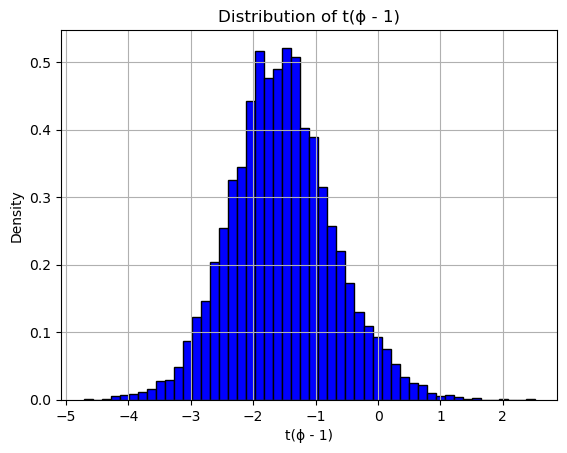

In [153]:
# Plot histogram of test statistics
plt.hist(test_stats, bins=50, density=True, color='blue', edgecolor='black')
plt.title('Distribution of t(ϕ - 1)')
plt.xlabel('t(ϕ - 1)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Critical Values:
1%: 311.9015878004291
5%: 386.55066444444543
10%: 433.97646875440955


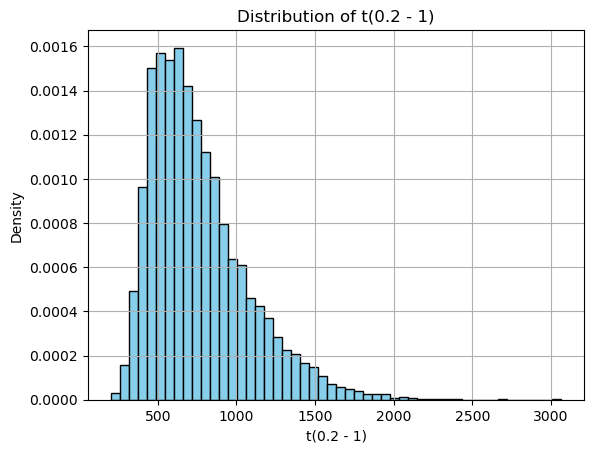

In [163]:
#2.7
# Number of Monte Carlo simulations
N = 10000
T = 2500

# Initialize array to store test statistics
test_stats = np.zeros(N)

# Perform Monte Carlo simulations
for i in range(N):
    # 1: Simulate error terms
    epsilon = np.random.normal(0, 1, size=T)

    # 2: Generate prices
    prices = np.cumsum(epsilon)

    # 3: Estimate AR(1) model with fixed coefficient
    X = sm.add_constant(prices[:-1])
    y = prices[1:] - 0.2 * prices[:-1]  # Adjusted price series for AR(1) model
    model = sm.OLS(y, X)
    results = model.fit()
    
    # 4: Compute test statistic
    t_stat = results.tvalues[1]  # Test statistic for coefficient of the lagged variable
    test_stats[i] = t_stat

# 5: Calculate critical values
critical_values = np.percentile(test_stats, [1, 5, 10])

print("Critical Values:")
print("1%:", critical_values[0])
print("5%:", critical_values[1])
print("10%:", critical_values[2])

# Plot histogram of test statistics
plt.hist(test_stats, bins=50, density=True, color='skyblue', edgecolor='black')
plt.title('Distribution of t(0.2 - 1)')
plt.xlabel('t(0.2 - 1)')
plt.ylabel('Density')
plt.grid(True)
plt.show()